In [1]:
import os
os.environ['PROJ_LIB'] = '/opt/conda/share/proj'

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
import os

df = pd.DataFrame()

# First collect the documents:
print("Reading weather data files")
path = './statsdb/'

for (path, dirlist, files) in os.walk(path):
    print(f'Found directory: {path}')
    
    for file in files:
        if file[0] not in '.abcd':  # Don't process hidden files
            continue

        df_temp = pd.read_csv(f'{path}/{file}')
        iceberg = file[:file.find('.')]
        df_temp['iceberg'] = iceberg
        df = df.append(df_temp, ignore_index=True)
        print(f'{file} imported, ({len(df_temp)} lines)')
            
print(f'{len(files)} weather files read. Total number of rows = {len(df)}')

Reading weather data files
Found directory: ./statsdb/
a01.csv imported, (100 lines)
a02.csv imported, (92 lines)
a03.csv imported, (4 lines)
a04.csv imported, (1 lines)
a05.csv imported, (8 lines)
a06.csv imported, (3 lines)
a07.csv imported, (1 lines)
a08.csv imported, (3 lines)
a09.csv imported, (1 lines)
a10.csv imported, (1 lines)
a11.csv imported, (2 lines)
a12.csv imported, (4 lines)
a13.csv imported, (40 lines)
a14.csv imported, (2 lines)
a15.csv imported, (28 lines)
a16.csv imported, (43 lines)
a17.csv imported, (4 lines)
a19.csv imported, (29 lines)
a20.csv imported, (38 lines)
a20a.csv imported, (202 lines)
a20b.csv imported, (232 lines)
a21.csv imported, (33 lines)
a21a.csv imported, (49 lines)
a22.csv imported, (1092 lines)
a22a.csv imported, (5000 lines)
a22b.csv imported, (2260 lines)
a22c.csv imported, (1128 lines)
a23.csv imported, (317 lines)
a23b.csv imported, (2838 lines)
a24.csv imported, (402 lines)
a24a.csv imported, (9 lines)
a24b.csv imported, (9 lines)
a24c.cs

In [3]:
df.head()

,date,date_gap,disp,flags,lat,lon,mask,size,vel_angle,iceberg
0,1978204,0,0.000,257,-60.219,-48.483,0,10.0,0.0,a01
1,1978205,1,0.331,257,-60.218,-48.488,0,10.0,0.0,a01
2,1978206,1,0.326,257,-60.217,-48.493,0,10.0,0.0,a01
3,1978207,1,0.332,257,-60.215,-48.498,0,10.0,0.0,a01
4,1978208,1,0.326,257,-60.214,-48.504,0,10.0,0.0,a01


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


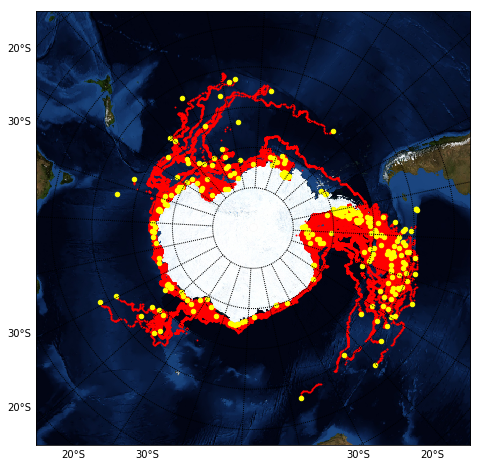

In [14]:
plt.figure(figsize=(8,8))
m = Basemap(projection='aeqd', resolution='l', lat_0=-90, lon_0=-138, width=12000000, height=12000000)

m.drawmeridians(np.arange(0,360,15))
m.drawparallels(np.arange(-90,90,10), labels=[1,0,0,1])

x, y = m(df['lon'].values, df['lat'].values)
m.scatter(x, y, 3, marker='.', color='r')

df_lastpos = df.groupby(['iceberg'])['lon', 'lat'].last()
x, y = m(df_lastpos['lon'].values, df_lastpos['lat'].values)

m.scatter(x, y, 20, marker='o', color='yellow')
m.bluemarble(scale=0.5)

In [5]:
# Do this for just the current - NIC icebergs